In [1]:
import numpy as np

from sklearn.metrics import classification_report

In [2]:
classes = [0, 1, 2, 3, 4, 5, 6,7] # 0~7 对应 HDPE, LDPE, PET, PET, PP, PS, PVC, NO_Plastic, other_resins

In [3]:
y_true = np.array([0]*274+[1]*324+[2]*436+[3]*692+[4]*141+[5]*87+[6]*285+[7]*231)

In [4]:
#Resnet-11
y_pred =np.array([0]*172+[1]*27+[2]*18+[3]*29+[4]*14+[5]*11+[6]*1+[7]*2+
                 [0]*14+[1]*257+[2]*24+[3]*20+[4]*2+[5]*2+[6]*0+[7]*5+
                 [0]*9+[1]*15+[2]*371+[3]*36+[4]*4+[5]*0+[6]*1+[7]*0+
                 [0]*74+[1]*10+[2]*54+[3]*496+[4]*25+[5]*2+[6]*13+[7]*18+
                 [0]*10+[1]* 0+[2]*10+[3]*49+[4]*71+[5]*1+[6]* 0+[7]* 0+
                 [0]*16+[1]*17+[2]*3+[3]*13+[4]*6+[5]*30+[6]*2+[7]* 0+
                 [0]*18+[1]*50+[2]*26+[3]*7+[4]*0+[5]*2+[6]*181+[7]*1+
                 [0]*27+[1]*18+[2]*25+[3]*36+[4]*2+[5]* 0+[6]* 20+[7]*103)

In [5]:
report = classification_report(y_true, y_pred, target_names=['HDPE', 'LDPE', 'PET', 'PP','PS', 'PVC', 'No_plastic', 'Other_resins'], digits=3)

In [6]:
print(report)

              precision    recall  f1-score   support

        HDPE      0.506     0.628     0.560       274
        LDPE      0.652     0.793     0.716       324
         PET      0.699     0.851     0.767       436
          PP      0.723     0.717     0.720       692
          PS      0.573     0.504     0.536       141
         PVC      0.625     0.345     0.444        87
  No_plastic      0.830     0.635     0.720       285
Other_resins      0.798     0.446     0.572       231

    accuracy                          0.681      2470
   macro avg      0.676     0.615     0.629      2470
weighted avg      0.693     0.681     0.676      2470



In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from scipy import interp
from itertools import cycle

nb_classes = 8 #four categories
y_pred = label_binarize(y_pred, classes=[i for i in range(nb_classes)])  

In [8]:
y_validate = np.array([0]*274+[1]*324+[2]*436+[3]*692+[4]*141+[5]*87+[6]*285+[7]*231)


y_pred =np.array([0]*172+[1]*27+[2]*18+[3]*29+[4]*14+[5]*11+[6]*1+[7]*2+
                 [0]*14+[1]*257+[2]*24+[3]*20+[4]*2+[5]*2+[6]*0+[7]*5+
                 [0]*9+[1]*15+[2]*371+[3]*36+[4]*4+[5]*0+[6]*1+[7]*0+
                 [0]*74+[1]*10+[2]*54+[3]*496+[4]*25+[5]*2+[6]*13+[7]*18+
                 [0]*10+[1]* 0+[2]*10+[3]*49+[4]*71+[5]*1+[6]* 0+[7]* 0+
                 [0]*16+[1]*17+[2]*3+[3]*13+[4]*6+[5]*30+[6]*2+[7]* 0+
                 [0]*18+[1]*50+[2]*26+[3]*7+[4]*0+[5]*2+[6]*181+[7]*1+
                 [0]*27+[1]*18+[2]*25+[3]*36+[4]*2+[5]* 0+[6]* 20+[7]*103)


nb_classes = 8 

y_pred = label_binarize(y_pred, classes=[i for i in range(nb_classes)])  

y_validate = label_binarize(y_validate, classes=[i for i in range(nb_classes)])

In [9]:
roc_path = r"E:\manuscipt\sorting_plastic\Figure_VGG\roc_VGG_11.jpg"  #image saved path

In [10]:
fpr = dict()   #false positive rate
tpr = dict()   #True Positive Rate
roc_auc = dict()
    
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validate[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [11]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_validate.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [12]:
# Compute macro-average ROC curve and ROC area
    # First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
        
for i in range(nb_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= nb_classes
        
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
lw = 2  #line width
plt.figure()        

<ipython-input-12-fe9e17fbc274>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

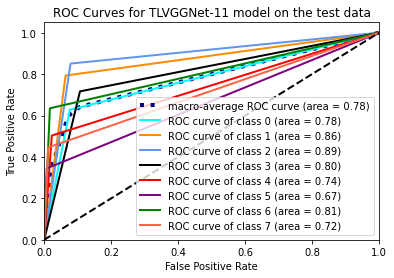

In [13]:
#与表格一样，micro-average 和macro-average 是两种方法计算的总体平均，可以选其中一个，把另一个的代码句注释掉即可
# plt.plot(fpr["micro"], tpr["micro"],
#                  label='micro-average ROC curve (area = {0:0.2f})'
#                  ''.format(roc_auc["micro"]),
#                  color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'black',"red","purple","green", "tomato"])
        
for i, color in zip(range(nb_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
            
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for TLVGGNet-11 model on the test data')
plt.legend(loc="lower right")
plt.savefig(roc_path, dpi=300)
plt.show()